In [2]:
%cd /fast/lorenz/Programs/Lagoon_surge_model
#%cd /home/lorenz/ownCloud/Programs/ECAS/Lagoons
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from model_functions import *

outdir_dump='/fast/lorenz/Programs/Lagoon_surge_model/dump/'

### general parameters and forcings:
dt = 50.0                      #s time step
T_M2 = 44714.0                 #s M2 period
T_max=20*T_M2                  #maximum simualtion length
N_max = int(T_max/dt)
t = np.linspace(0,T_max,N_max+1)

dt_non_dim = dt/T_M2           #non-dimensional time step
T_max_non_dim = T_max/T_M2     #non-dimensioanl simlation length

####
# Tidal forcing
####
amp_M2=1.5                     #M2 amplitude
eta_data=np.sin(t/T_M2*2*np.pi)*amp_M2 #dimensional boundary M2 elevation
eta_data_non_dim = eta_data/amp_M2 #non-dim boundary M2 elevation

####
# Surge forcings
####

eta_surge_4h_a=eta_gauss(amp_M2,4*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_4h_2a=eta_gauss(2*amp_M2,4*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_4h_a_non_dim = eta_surge_4h_a/amp_M2
eta_surge_4h_2a_non_dim = eta_surge_4h_2a/amp_M2

eta_surge_6h_a=eta_gauss(amp_M2,6*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_6h_2a=eta_gauss(2*amp_M2,6*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_6h_a_non_dim = eta_surge_6h_a/amp_M2
eta_surge_6h_2a_non_dim = eta_surge_6h_2a/amp_M2

eta_surge_8h_a=eta_gauss(amp_M2,8*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_8h_2a=eta_gauss(2*amp_M2,8*3600.0,17.25*T_M2,T_max,int(T_max/dt))
eta_surge_8h_a_non_dim = eta_surge_8h_a/amp_M2
eta_surge_8h_2a_non_dim = eta_surge_8h_2a/amp_M2

####
# Freshwater forcings
####

Q_ref = 0.0
Q_r_event_7500 = eta_gauss(7500.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref
Q_r_event_5000 = eta_gauss(5000.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref
Q_r_event_2500 = eta_gauss(2500.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref

Q_ref = 100.0
Q_r_event_7500_100 = eta_gauss(7500.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref
Q_r_event_5000_100 = eta_gauss(5000.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref
Q_r_event_2500_100 = eta_gauss(2500.0,48*3600.0,17.25*T_M2,T_max,int(T_max/dt)) + Q_ref

####
# sea level rise
####

SLR_10 = 1.0                   # m sea level rise
SLR_10_non_dim = SLR_10/amp_M2 # non-dim sea level rise

####
# define the parameter space
####

# choking parameter P
P_ar = np.array([0.1,0.25,0.5,0.75,1.,1.25,1.5,2.0,3.0,4.0,5.0,6.0,8.0,10.0])
P_ar.dump(outdir_dump+'P_ar.npy')
# a/H
zeta_ar = np.linspace(0.1,1.0,10,endpoint=True) # this is a/H
zeta_ar.dump(outdir_dump+'zeta_ar.npy')

pp,zz = np.meshgrid(P_ar,zeta_ar)

#parameter space for S
S_ar = np.linspace(0.0,0.3,10,endpoint=True)
S_ar.dump(outdir_dump+'S_ar.npy')
pp2,ss = np.meshgrid(P_ar,S_ar)


/fast/lorenz/Programs/Lagoon_surge_model


Results: Present tides

In [5]:
result_M2 = np.zeros(pp.shape) # a
result_M2_max = np.zeros(pp.shape)
result_M2_mean = np.zeros(pp.shape)
print(result_M2.shape)
for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                                               T_max_non_dim,
                                                                               eta_data_non_dim,
                                                                                integration='RK')

        Amp_M2_lagoon_const = 0.5*(eta_result_stig_non_dim[-int(T_M2/dt):-2].max()-eta_result_stig_non_dim[-int(T_M2/dt):-2].min())
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_M2[j,i] = Amp_M2_lagoon_const
        result_M2_max[j,i] = eta_result_stig_non_dim[-int(T_M2/dt):-2].max()
        result_M2_mean[j,i] = eta_result_stig_non_dim[-int(T_M2/dt):-2].mean()

result_M2.dump(outdir_dump+'result_M2.npy')       
result_M2_max.dump(outdir_dump+'result_M2_max.npy')   
result_M2_mean.dump(outdir_dump+'result_M2_mean.npy')  

(10, 14)


Results: present surge

In [7]:
result_surge = np.zeros(pp.shape) # a
print(result_surge.shape)
for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                                               T_max_non_dim,
                                                                               eta_surge_6h_a_non_dim,
                                                                                integration='RK')

        Amp_lagoon = eta_result_stig_non_dim.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_surge[j,i] = Amp_lagoon

result_surge.dump(outdir_dump+'result_surge.npy')

(10, 14)


Results: present tide-surge

In [11]:
result_tide_surge = np.zeros(pp.shape) # a
print(result_tide_surge.shape)
for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                                               T_max_non_dim,
                                                                               eta_surge_6h_a_non_dim+eta_data_non_dim,
                                                                                integration='RK')

        Amp_lagoon = eta_result_stig_non_dim.max()
        #print(j,i,z,p,Amp_lagoon)
        result_tide_surge[j,i] = Amp_lagoon

result_tide_surge.dump(outdir_dump+'result_tide_surge.npy')

(10, 14)


Results: constant freshwater supply, S = const.; a/H = 1.0

In [14]:
result_P_S_space_aH_10 = np.zeros(pp.shape) # a
result_P_S_space_aH_10_tides = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,s in enumerate(S_ar):
        eta_result_non_dim = model_non_dim(1.0,p,dt_non_dim,T_max_non_dim,
                                                       np.full(eta_data_non_dim.shape,0.0),
                                                       S=s,integration='RK')
        
        result_P_S_space_aH_10[j,i] = eta_result_non_dim[-int(T_M2/dt)-2:-2].mean()
        
        eta_result_non_dim = model_non_dim(1.0,p,dt_non_dim,T_max_non_dim,
                                                       eta_data_non_dim,
                                                       S=s,integration='RK')
        
        result_P_S_space_aH_10_tides[j,i] = eta_result_non_dim[-int(T_M2/dt)-2:-2].mean()

result_P_S_space_aH_10.dump(outdir_dump+'result_P_S_space_aH_10.npy')
result_P_S_space_aH_10_tides.dump(outdir_dump+'result_P_S_space_aH_10_tides.npy')

Results: freshwater pulse $Q_r = 2500$ m3s-1, $\sigma = 48$ h

In [2]:
# These simulation take the dimensional version of the model.
# Therefore, we need to fix some parameters, but change the others accordingly
# to get the same choking responses as before from a/H and P
# fixed parameters:
g=9.81
A=1e08
k=0.001
L=10000.0
#compute H and W accordingly, over these will be looped

hh = amp_M2/zz
ww = pp*A/(T_M2)*np.sqrt(k*L*zz**3/(amp_M2**2*g))

result_Qr_event_2500_48h = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           np.zeros(eta_data.shape),
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_2500)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_Qr_event_2500_48h[j,i] = Amp_lagoon/amp_M2        
        
result_Qr_event_2500_48h.dump(outdir_dump+'result_Qr_event_2500_48h.npy')

Results: constant discarge 100 m3s-1

In [5]:
Q_ref = 100.0
result_dimensional_Q0_100 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           np.zeros(eta_data.shape),
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_ref)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_dimensional_Q0_100[j,i] = Amp_lagoon/amp_M2        
        
result_dimensional_Q0_100.dump(outdir_dump+'result_dimensional_Q0_100.npy')

Results: compund event with everthing

In [19]:
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_2500_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h.npy')

result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_5000_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h.npy')

result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_7500_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h.npy')



Plot Figure 2 of the manuscript

/fast/lorenz/Programs
/fast/lorenz/Programs/Lagoon_surge_model


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


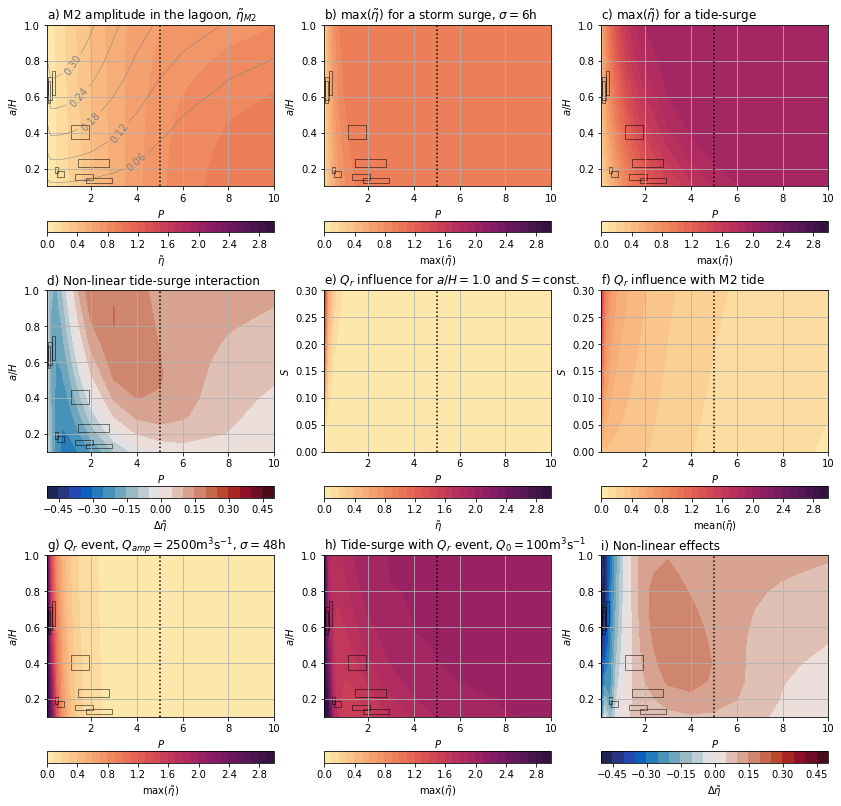

In [11]:
PLOT_REAL_LAGOONS = True
#### Make Figure of the present conditions
cmap = 'YlOrRd'
cmap_div = 'seismic'

%cd /fast/lorenz/Programs/
import cmocean
%cd /fast/lorenz/Programs/Lagoon_surge_model

cmap = cmocean.cm.matter
cmap_div = cmocean.cm.balance
### Plot Q_r mean water level in lagoon compared to eta_0 = 0
P_ar = np.load(outdir_dump+'P_ar.npy',allow_pickle=True)
zeta_ar = np.load(outdir_dump+'zeta_ar.npy',allow_pickle=True)
pp1,zz = np.meshgrid(P_ar,zeta_ar)
S_ar = np.load(outdir_dump+'S_ar.npy',allow_pickle=True)
pp2,ss = np.meshgrid(P_ar,S_ar)


result_tide_surge = np.load(outdir_dump+'result_tide_surge.npy',allow_pickle=True)
result_surge = np.load(outdir_dump+'result_surge.npy',allow_pickle=True)
result_M2 = np.load(outdir_dump+'result_M2.npy',allow_pickle=True)
result_M2_mean = np.load(outdir_dump+'result_M2_mean.npy',allow_pickle=True)
result_M2_max = np.load(outdir_dump+'result_M2_max.npy',allow_pickle=True)

fig,axx=plt.subplots(3,3,figsize=(14,14))
ax=axx.flatten()

ax[0].set_title('a) M2 amplitude in the lagoon, $\\tilde{\eta}_{M2}$',loc='left',fontsize=12.0)
ax[0].grid('on')
cont = ax[0].contourf(pp1,zz,result_M2,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
cont2 = ax[0].contour(pp1,zz,result_M2_mean,colors='grey',linewidths=0.5,
                      levels=np.linspace(0.0,0.3,6,endpoint=True))
ax[0].clabel(cont2, cont2.levels, inline=True, fmt='%.2f')
plt.colorbar(cont,label='$\\tilde{\eta}$', ax=ax[0],orientation='horizontal',pad=0.15)
ax[0].set_ylabel('$a/H$')
ax[0].set_xlabel('$P$')
ax[0].set_ylim(0.1,1.0)
ax[0].set_xlim(0.1,10.0)
ax[0].axvline(5.0,ls='dotted',color='k')

ax[1].set_title('b) max($\\tilde{\eta}$) for a storm surge, $\sigma = 6$h',loc='left',fontsize=12.0)
ax[1].grid('on')
cont = ax[1].contourf(pp1,zz,result_surge,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
plt.colorbar(cont,label='max($\\tilde{\eta}$)', ax=ax[1],orientation='horizontal',pad=0.15)
ax[1].set_ylabel('$a/H$')
ax[1].set_xlabel('$P$')
ax[1].set_ylim(0.1,1.0)
ax[1].set_xlim(0.1,10.0)
ax[1].axvline(5.0,ls='dotted',color='k')

ax[2].set_title('c) max($\\tilde{\eta}$) for a tide-surge',loc='left',fontsize=12.0)
ax[2].grid('on')
cont = ax[2].contourf(pp1,zz,result_tide_surge,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
plt.colorbar(cont,label='max($\\tilde{\eta}$)',ax = ax[2],orientation='horizontal',pad=0.15)
ax[2].set_ylabel('$a/H$')
ax[2].set_xlabel('$P$')
ax[2].set_ylim(0.1,1.0)
ax[2].set_xlim(0.1,10.0)
ax[2].axvline(5.0,ls='dotted',color='k')

ax[3].set_title('d) Non-linear tide-surge interaction',loc='left',fontsize=12.0)
ax[3].grid('on')
cont = ax[3].contourf(pp1,zz,result_tide_surge-result_M2-result_surge-result_M2_mean,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
plt.colorbar(cont,label='$\Delta \\tilde{\eta}$',ax = ax[3],orientation='horizontal',pad=0.15)
ax[3].set_ylabel('$a/H$')
ax[3].set_xlabel('$P$')
ax[3].set_ylim(0.1,1.0)
ax[3].set_xlim(0.1,10.0)
ax[3].axvline(5.0,ls='dotted',color='k')

#####
# Q_r = const with and without tides
#####

result_P_S_space_aH_10=np.load(outdir_dump+'result_P_S_space_aH_10.npy',allow_pickle=True)
result_P_S_space_aH_10_tides=np.load(outdir_dump+'result_P_S_space_aH_10_tides.npy',allow_pickle=True)
vmax=1.5
result_P_S_space_aH_10[result_P_S_space_aH_10>vmax]=vmax
result_P_S_space_aH_10_tides[result_P_S_space_aH_10_tides>vmax]=vmax

ax[4].set_title('e) $Q_r$ influence for $a/H = 1.0$ and $S=$const.',loc='left')
ax[4].grid('on')
cont6 = ax[4].contourf(pp2,ss,result_P_S_space_aH_10,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
plt.colorbar(cont6,label='$\\tilde{\eta}$',ax=ax[4],orientation='horizontal',pad=0.15)
ax[4].set_ylabel('$S$')
ax[4].set_xlabel('$P$')
ax[4].set_ylim(0.,0.3)
ax[4].set_xlim(0.1,10.0)
ax[4].axvline(5.0,ls='dotted',color='k')

ax[5].set_title('f) $Q_r$ influence with M2 tide',loc='left')
ax[5].grid('on')
cont6 = ax[5].contourf(pp2,ss,result_P_S_space_aH_10_tides,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='mean($\\tilde{\eta}$)',ax=ax[5],orientation='horizontal',pad=0.15)
ax[5].set_ylabel('$S$')
ax[5].set_xlabel('$P$')
ax[5].set_ylim(0.,0.3)
ax[5].set_xlim(0.1,10.0)
ax[5].axvline(5.0,ls='dotted',color='k')

#####
# Q_r pulse, Q_0 = 0 with and without tides
#####

result_Qr_event_2500_48h=np.load(outdir_dump+'result_Qr_event_2500_48h.npy',allow_pickle=True)
#result_tides_Qr_event_7500_48h=np.load(outdir_dump+'result_tides_Qr_event_7500_48h.npy',allow_pickle=True)

vmax=3.0
result_Qr_event_2500_48h[result_Qr_event_2500_48h>vmax] = vmax
#result_tides_Qr_event_7500_48h[result_tides_Qr_event_7500_48h>vmax] = vmax

ax[6].set_title('g) $Q_r$ event, $Q_{amp} = 2500$m$^3$s$^{-1}$, $\sigma=48$h',loc='left')
ax[6].grid('on')
cont6 = ax[6].contourf(pp1,zz,result_Qr_event_2500_48h,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
plt.colorbar(cont6,label='max($\\tilde{\eta}$)',ax=ax[6],orientation='horizontal',pad=0.15)
ax[6].set_ylabel('$a/H$')
ax[6].set_xlabel('$P$')
ax[6].set_ylim(0.1,1.0)
ax[6].set_xlim(0.1,10.0)
ax[6].axvline(5.0,ls='dotted',color='k')

####
# compound
####

### with Q_0 = 100

result_dimensional_Q0_100 = np.load(outdir_dump+'result_dimensional_Q0_100.npy',allow_pickle=True)
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h.npy',allow_pickle=True)
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h[result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h>vmax] = vmax

ax[7].set_title('h) Tide-surge with $Q_r$ event, $Q_0 =100$m$^3$s$^{-1}$',loc='left')
ax[7].grid('on')
cont6 = ax[7].contourf(pp1,zz,result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='max($\\tilde{\eta}$)',ax=ax[7],orientation='horizontal',pad=0.15)
ax[7].set_ylabel('$a/H$')
ax[7].set_xlabel('$P$')
ax[7].set_ylim(0.1,1.0)
ax[7].set_xlim(0.1,10.0)
ax[7].axvline(5.0,ls='dotted',color='k')

show = result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h-result_M2-result_M2_mean-result_surge-result_Qr_event_2500_48h-result_dimensional_Q0_100
show[show<-0.5] = -0.5                      

ax[8].set_title('i) Non-linear effects',loc='left')
ax[8].grid('on')
cont6 = ax[8].contourf(pp1,zz,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='$\Delta \\tilde{\eta}$',ax=ax[8],orientation='horizontal',pad=0.15)
ax[8].set_ylabel('$a/H$')
ax[8].set_xlabel('$P$')
ax[8].set_ylim(0.1,1.0)
ax[8].set_xlim(0.1,10.0)
ax[8].axvline(5.0,ls='dotted',color='k')

P_ar_lagoons = [[1.45,1.90], #Sabine
                [1.97,2.67], #Trinity
                [1.58,2.55], #West Bay
                [0.6,0.77], #Matagorda
                [0.16,0.28], #San Antonio
                [0.35,0.4], #Aransas
                [1.28,1.75],#Corpus
                [0.15,0.22],#Saaler
                [0.5,0.51] #Szczecin
               ]
zeta_ar_lagoons = [0.15,0.13,0.23,0.17,0.64,0.67,0.4,0.62,0.19]

if PLOT_REAL_LAGOONS:
    import matplotlib.patches as patches
    for ii in np.arange(len(P_ar_lagoons)):
        P_min = 0.9*P_ar_lagoons[ii][0]
        P_max = 1.1*P_ar_lagoons[ii][1]
        zeta = zeta_ar_lagoons[ii]
        zeta_min = zeta/1.1
        zeta_max = zeta/0.9
        for jj in np.arange(len(ax)):
            if jj == 4 or jj == 5:
                continue
            rect = patches.Rectangle((P_min, zeta_min), P_max-P_min, zeta_max-zeta_min, linewidth=0.5, edgecolor='black', facecolor='none')
            ax[jj].add_patch(rect)

fig.subplots_adjust(hspace=0.15,wspace=0.22)
#ax[0].legend(loc='upper left')
plt.savefig(outdir_dump+'Figure_2.png',format = 'png',bbox_inches='tight',dpi=300)

Results: SLR effect on tides

In [13]:
result_M2_SLR_10 = np.zeros(pp.shape) # a
result_M2_SLR_10_mean = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                            T_max_non_dim,
                                                            eta_data_non_dim+SLR_10_non_dim,
                                                            integration='RK')

        Amp_M2_lagoon_const = 0.5*(eta_result_stig_non_dim[-int(T_M2/dt):-2].max()-eta_result_stig_non_dim[-int(T_M2/dt):-2].min())
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_M2_SLR_10[j,i] = Amp_M2_lagoon_const
        result_M2_SLR_10_mean[j,i] = eta_result_stig_non_dim[-int(T_M2/dt):-2].mean()
        
result_M2_SLR_10.dump(outdir_dump+'result_M2_SLR_10.npy')
result_M2_SLR_10_mean.dump(outdir_dump+'result_M2_SLR_10_mean.npy')

Results: SLR effect on surges

In [15]:
result_surge_SLR_10 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                                T_max_non_dim,
                                                                SLR_10_non_dim+eta_surge_6h_a_non_dim,
                                                                integration='RK')

        Amp_M2_lagoon_const = eta_result_stig_non_dim.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_surge_SLR_10[j,i] = Amp_M2_lagoon_const
        
result_surge_SLR_10.dump(outdir_dump+'result_surge_SLR_10.npy')

Results: Tide-surge with SLR

In [16]:
result_M2_surge_SLR_10 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):

        eta_result_stig_non_dim = model_non_dim(z,p,dt_non_dim,
                                                T_max_non_dim,
                                        eta_data_non_dim+SLR_10_non_dim+eta_surge_6h_a_non_dim,
                                                integration='RK')

        Amp_M2_lagoon_const = eta_result_stig_non_dim.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_M2_surge_SLR_10[j,i] = Amp_M2_lagoon_const

result_M2_surge_SLR_10.dump(outdir_dump+'result_M2_surge_SLR_10.npy')

Results: SLR effect on river discharge

In [17]:
result_P_S_space_aH_10_SLR_10 = np.zeros(pp.shape) # a
result_P_S_space_aH_10_tides_SLR_10 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,s in enumerate(S_ar):
        eta_result_non_dim = model_non_dim(1.0,p,dt_non_dim,T_max_non_dim,
                                                       np.full(eta_data_non_dim.shape,0.0)+SLR_10_non_dim,
                                                       S=s,integration='RK')
        
        result_P_S_space_aH_10_SLR_10[j,i] = eta_result_non_dim[-int(T_M2/dt)-2:-2].mean()
        
        eta_result_non_dim = model_non_dim(1.0,p,dt_non_dim,T_max_non_dim,
                                                       eta_data_non_dim+SLR_10_non_dim,
                                                       S=s,integration='RK')
        
        result_P_S_space_aH_10_tides_SLR_10[j,i] = eta_result_non_dim[-int(T_M2/dt)-2:-2].mean()
        

result_P_S_space_aH_10_SLR_10.dump(outdir_dump+'result_P_S_space_aH_10_SLR_10.npy')
result_P_S_space_aH_10_tides_SLR_10.dump(outdir_dump+'result_P_S_space_aH_10_tides_SLR_10.npy')

Results: SLR effect on freshwater runoff event

In [18]:
result_Qr_event_2500_48h_SLR_10 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           np.zeros(eta_data.shape)+SLR_10,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_2500)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_Qr_event_2500_48h_SLR_10[j,i] = Amp_lagoon/amp_M2        
        
result_Qr_event_2500_48h_SLR_10.dump(outdir_dump+'result_Qr_event_2500_48h_SLR_10.npy')

Results: SLR effect on compound events

In [20]:
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR_1 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data+SLR_10,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_2500_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR_1[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR_1.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR_1.npy')

result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR_1 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data+SLR_10,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_5000_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR_1[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR_1.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR_1.npy')

result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR_1 = np.zeros(pp.shape) # a

for i,p in enumerate(P_ar):
    for j,z in enumerate(zeta_ar):
        eta_result_stig_const= model(A,hh[j,i],ww[j,i],L,k,dt,
                                           T_max,
                                           eta_surge_6h_a+eta_data+SLR_10,
                                           SLR=0.0,
                                           k_method='const',
                                           z_0=k,
                                           integration='RK',
                                           Q_r=Q_r_event_7500_100)
        Amp_lagoon = eta_result_stig_const.max()
        #print(j,i,z,p,Amp_M2_lagoon_const)
        result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR_1[j,i] = Amp_lagoon/amp_M2        
        
result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR_1.dump(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR_1.npy')

Plot Figure 3

/fast/lorenz/Programs
/fast/lorenz/Programs/Lagoon_surge_model


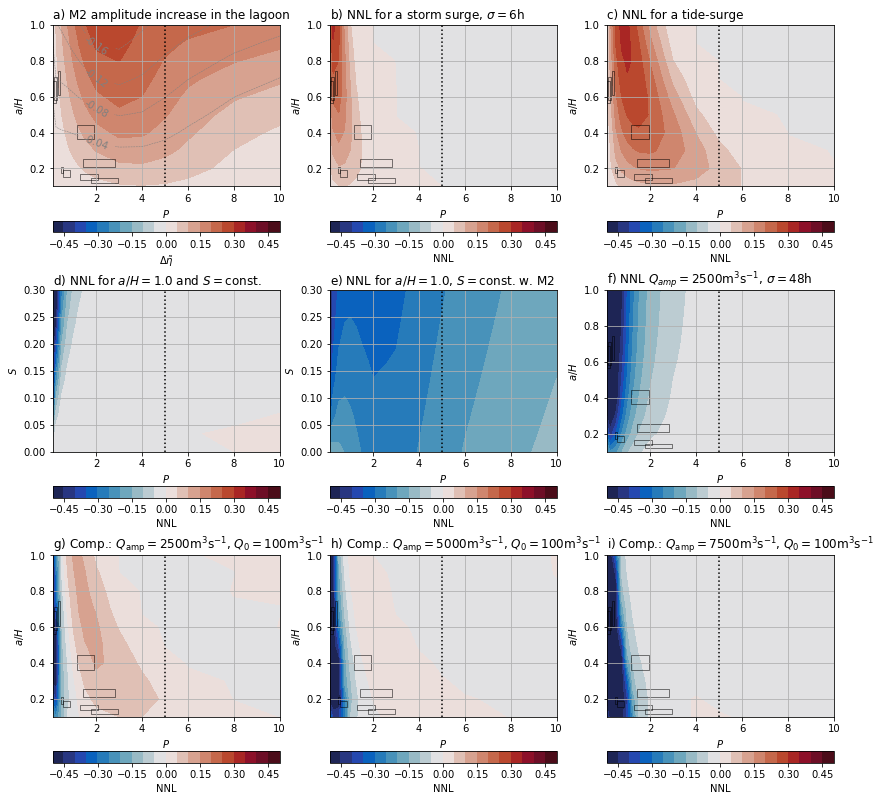

In [24]:
# NNL effect
PLOT_REAL_LAGOONS=True

#### Make Figure of the present conditions
cmap = 'YlOrRd'
cmap_div = 'seismic'
%cd /fast/lorenz/Programs/
import cmocean
%cd /fast/lorenz/Programs/Lagoon_surge_model
cmap = cmocean.cm.matter
cmap_div = cmocean.cm.balance
### Plot Q_r mean water level in lagoon compared to eta_0 = 0
P_ar = np.load(outdir_dump+'P_ar.npy',allow_pickle=True)
zeta_ar = np.load(outdir_dump+'zeta_ar.npy',allow_pickle=True)
pp1,zz = np.meshgrid(P_ar,zeta_ar)
S_ar = np.load(outdir_dump+'S_ar.npy',allow_pickle=True)
pp2,ss = np.meshgrid(P_ar,S_ar)

result_tide_surge = np.load(outdir_dump+'result_tide_surge.npy',allow_pickle=True)
result_surge = np.load(outdir_dump+'result_surge.npy',allow_pickle=True)
result_M2 = np.load(outdir_dump+'result_M2.npy',allow_pickle=True)

result_tide_surge_SLR = np.load(outdir_dump+'result_M2_surge_SLR_10.npy',allow_pickle=True)
result_surge_SLR = np.load(outdir_dump+'result_surge_SLR_10.npy',allow_pickle=True)
result_M2_SLR = np.load(outdir_dump+'result_M2_SLR_10.npy',allow_pickle=True)
result_M2_mean_SLR = np.load(outdir_dump+'result_M2_SLR_10_mean.npy',allow_pickle=True)

fig,axx=plt.subplots(3,3,figsize=(14,14))
ax=axx.flatten()

ax[0].set_title('a) M2 amplitude increase in the lagoon',loc='left',fontsize=12.0)
ax[0].grid('on')
cont = ax[0].contourf(pp1,zz,result_M2_SLR-result_M2,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
cont2 = ax[0].contour(pp1,zz,result_M2_mean_SLR-result_M2_mean-SLR_non_dim,colors='grey',linewidths=0.5,
                      levels=np.linspace(-0.2,0.0,6,endpoint=True))
ax[0].clabel(cont2, cont2.levels, inline=True, fmt='%.2f')
plt.colorbar(cont,label='$\Delta \\tilde{\eta}$', ax=ax[0],orientation='horizontal',pad=0.15)
ax[0].set_ylabel('$a/H$')
ax[0].set_xlabel('$P$')
ax[0].set_ylim(0.1,1.0)
ax[0].set_xlim(0.1,10.0)
ax[0].axvline(5.0,ls='dotted',color='k')


ax[1].set_title('b) NNL for a storm surge, $\sigma = 6$h',loc='left',fontsize=12.0)
ax[1].grid('on')
cont = ax[1].contourf(pp1,zz,NNL(result_surge,result_surge_SLR,SLR_non_dim),vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
plt.colorbar(cont,label='NNL', ax=ax[1],orientation='horizontal',pad=0.15)
ax[1].set_ylabel('$a/H$')
ax[1].set_xlabel('$P$')
ax[1].set_ylim(0.1,1.0)
ax[1].set_xlim(0.1,10.0)
ax[1].axvline(5.0,ls='dotted',color='k')

ax[2].set_title('c) NNL for a tide-surge',loc='left',fontsize=12.0)
ax[2].grid('on')
cont = ax[2].contourf(pp1,zz,NNL(result_tide_surge,result_tide_surge_SLR,SLR_non_dim),vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
plt.colorbar(cont,label='NNL',ax = ax[2],orientation='horizontal',pad=0.15)
ax[2].set_ylabel('$a/H$')
ax[2].set_xlabel('$P$')
ax[2].set_ylim(0.1,1.0)
ax[2].set_xlim(0.1,10.0)
ax[2].axvline(5.0,ls='dotted',color='k')

#####
# Q_r = const with and without tides
#####

result_P_S_space_aH_10=np.load(outdir_dump+'result_P_S_space_aH_10.npy',allow_pickle=True)
result_P_S_space_aH_10_tides=np.load(outdir_dump+'result_P_S_space_aH_10_tides.npy',allow_pickle=True)

result_P_S_space_aH_10_SLR_10=np.load(outdir_dump+'result_P_S_space_aH_10_SLR_10.npy',allow_pickle=True)
result_P_S_space_aH_10_tides_SLR_10=np.load(outdir_dump+'result_P_S_space_aH_10_tides_SLR_10.npy',allow_pickle=True)

show = NNL(result_P_S_space_aH_10,result_P_S_space_aH_10_SLR_10,SLR_non_dim)
vmin=-0.5
show[show<vmin] = vmin

ax[3].set_title('d) NNL for $a/H = 1.0$ and $S=$const.',loc='left')
ax[3].grid('on')
cont6 = ax[3].contourf(pp2,ss,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
plt.colorbar(cont6,label='NNL',ax=ax[3],orientation='horizontal',pad=0.15)
ax[3].set_ylabel('$S$')
ax[3].set_xlabel('$P$')
ax[3].set_ylim(0.,0.3)
ax[3].set_xlim(0.1,10.0)
ax[3].axvline(5.0,ls='dotted',color='k')

show = NNL(result_P_S_space_aH_10_tides,result_P_S_space_aH_10_tides_SLR_10,SLR_non_dim)
vmin=-0.5
show[show<vmin] = vmin

ax[4].set_title('e) NNL for $a/H = 1.0$, $S=$const. w. M2',loc='left')
ax[4].grid('on')
cont6 = ax[4].contourf(pp2,ss,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='NNL',ax=ax[4],orientation='horizontal',pad=0.15)
ax[4].set_ylabel('$S$')
ax[4].set_xlabel('$P$')
ax[4].set_ylim(0.,0.3)
ax[4].set_xlim(0.1,10.0)
ax[4].axvline(5.0,ls='dotted',color='k')

#####
# Q_r pulse, Q_0 = 0 with and without tides
#####

result_Qr_event_2500_48h=np.load(outdir_dump+'result_Qr_event_2500_48h.npy',allow_pickle=True)

result_Qr_event_2500_48h_SLR=np.load(outdir_dump+'result_Qr_event_2500_48h_SLR_10.npy',allow_pickle=True)

show = NNL(result_Qr_event_2500_48h,result_Qr_event_2500_48h_SLR,SLR_non_dim)

show[show<-0.5] = -0.5
ax[5].set_title('f) NNL $Q_{amp} = 2500$m$^3$s$^{-1}$, $\sigma = 48$h',loc='left')
ax[5].grid('on')
cont6 = ax[5].contourf(pp1,zz,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
plt.colorbar(cont6,label='NNL',ax=ax[5],orientation='horizontal',pad=0.15)
ax[5].set_ylabel('$a/H$')
ax[5].set_xlabel('$P$')
ax[5].set_ylim(0.1,1.0)
ax[5].set_xlim(0.1,10.0)
ax[5].axvline(5.0,ls='dotted',color='k')


####
# compound
####

### with Q_0 = 100
vmin = -0.5
result_dimensional_Q0_100 = np.load(outdir_dump+'result_dimensional_Q0_100.npy',allow_pickle=True)
result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h.npy',allow_pickle=True)

result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR_1.npy',allow_pickle=True)
show = NNL(result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h,result_tide_surge_dimensional_Q0_100_Qr_event_2500_48h_SLR,SLR_non_dim)
show[show<vmin] = vmin
ax[6].set_title('g) Comp.: $Q_{\mathrm{amp}} = 2500$m$^3$s$^{-1}$, $Q_0 =100$m$^3$s$^{-1}$',loc='left')
ax[6].grid('on')
cont6 = ax[6].contourf(pp1,zz,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='NNL',ax=ax[6],orientation='horizontal',pad=0.15)
ax[6].set_ylabel('$a/H$')
ax[6].set_xlabel('$P$')
ax[6].set_ylim(0.1,1.0)
ax[6].set_xlim(0.1,10.0)
ax[6].axvline(5.0,ls='dotted',color='k')

result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h.npy',allow_pickle=True)

result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR_1.npy',allow_pickle=True)
show = NNL(result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h,result_tide_surge_dimensional_Q0_100_Qr_event_5000_48h_SLR,SLR_non_dim)
show[show<vmin] = vmin
ax[7].set_title('h) Comp.: $Q_{\mathrm{amp}} = 5000$m$^3$s$^{-1}$, $Q_0 =100$m$^3$s$^{-1}$',loc='left')
ax[7].grid('on')
cont6 = ax[7].contourf(pp1,zz,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='NNL',ax=ax[7],orientation='horizontal',pad=0.15)
ax[7].set_ylabel('$a/H$')
ax[7].set_xlabel('$P$')
ax[7].set_ylim(0.1,1.0)
ax[7].set_xlim(0.1,10.0)
ax[7].axvline(5.0,ls='dotted',color='k')


result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h.npy',allow_pickle=True)

result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR = np.load(outdir_dump+'result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR_1.npy',allow_pickle=True)
show = NNL(result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h,result_tide_surge_dimensional_Q0_100_Qr_event_7500_48h_SLR,SLR_non_dim)
show[show<vmin] = vmin
ax[8].set_title('i) Comp.: $Q_{\mathrm{amp}} = 7500$m$^3$s$^{-1}$, $Q_0 =100$m$^3$s$^{-1}$',loc='left')
ax[8].grid('on')
cont6 = ax[8].contourf(pp1,zz,show,vmin=-0.5,vmax=0.5,cmap=cmap_div,
                      levels=np.linspace(-0.5,0.5,21,endpoint=True))
#ax[0].set_xlim(1.0,10.0)
#axcolorbar3=fig.add_axes([0.92, 0.125, 0.0125, 0.21])
plt.colorbar(cont6,label='NNL',ax=ax[8],orientation='horizontal',pad=0.15)
ax[8].set_ylabel('$a/H$')
ax[8].set_xlabel('$P$')
ax[8].set_ylim(0.1,1.0)
ax[8].set_xlim(0.1,10.0)
ax[8].axvline(5.0,ls='dotted',color='k')

P_ar_lagoons = [[1.45,1.90], #Sabine
                [1.97,2.67], #Trinity
                [1.58,2.55], #West Bay
                [0.6,0.77], #Matagorda
                [0.16,0.28], #San Antonio
                [0.35,0.4], #Aransas
                [1.28,1.75],#Corpus
                [0.15,0.22],#Saaler
                [0.5,0.51] #Szczecin
               ]
zeta_ar_lagoons = [0.15,0.13,0.23,0.17,0.64,0.67,0.4,0.62,0.19]

if PLOT_REAL_LAGOONS:
    import matplotlib.patches as patches
    for ii in np.arange(len(P_ar_lagoons)):
        P_min = 0.9*P_ar_lagoons[ii][0]
        P_max = 1.1*P_ar_lagoons[ii][1]
        zeta = zeta_ar_lagoons[ii]
        zeta_min = zeta/1.1
        zeta_max = zeta/0.9
        for jj in np.arange(len(ax)):
            if jj ==3 or jj==4:
                continue
            rect = patches.Rectangle((P_min, zeta_min), P_max-P_min, zeta_max-zeta_min, linewidth=0.5, edgecolor='black', facecolor='none')
            ax[jj].add_patch(rect)

fig.subplots_adjust(hspace=0.15,wspace=0.22)
#ax[0].legend(loc='upper left')
plt.savefig(outdir_dump+'Figure_3.png',format = 'png',bbox_inches='tight',dpi=300)

Supplement: representative choking parameter P

/fast/lorenz/Programs/Lagoon_surge_model/model_functions.py:168: RuntimeWarning: invalid value encountered in power
  result = P*(1.0+zeta*(eta_0+eta)/2.0)**(3./2.) * np.sqrt(np.abs(eta_0 - eta))*np.sign(eta_0 - eta) + S


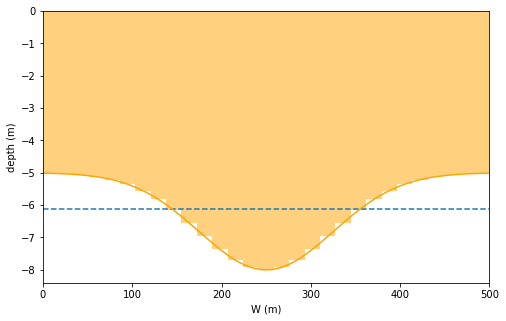

In [3]:
#####
# Check errors of resolved vs unresolved but summed P a/H_mean for M2 tide
#####

#### define the lagoons:

Ws = [500.0, 1000.0, 1500.0]
H_mins = [5.0,3.0,1.0]
H_maxs = [8.0, 10.0, 15.0]
W_gausss = [75.0,100.0,150.0,200.0]
As=[1e08,1e09]
L=10000.0
k=0.001
g=9.81

#number of segments the inlet is split into (n-1 inlets)
n = 30

#change dimension of the forcing to match number of inlets:
eta_data_non_dim_multi = np.zeros((len(eta_data_non_dim),n-1))
eta_data_non_dim_multi[:,:] = eta_data_non_dim[:,None]

P_resolved = []
zeta_resolved = []
P_sum_ar = []
P_mean_ar = []
zeta_mean_ar = []
a_lagoon_resolved = []
a_lagoon_Psum = []
a_lagoon_Pmean = []

iii=0
for A in As:
    for W in Ws:
        for Hmin in H_mins:
            for Hmax in H_maxs:
                for Wgauss in W_gausss:
                    W_pos = np.linspace(0,W,n,endpoint=True)
                    W_ar = np.diff(W_pos)
                    W_center = W_pos[:-1]+W_ar/2

                    H_ar = Gauss_cross(W_center,W,Hmax,Hmin,Wgauss)

                    if iii==0:
                        # Plot on example how the inlet looks like
                        plt.figure(figsize=(8,5))
                        plt.axhline(-H_ar.mean(),ls='dashed')
                        plt.bar(W_center,-H_ar,width=W_ar,color='orange',alpha=0.5)
                        plt.plot(np.linspace(0,W,1000,endpoint=True),-Gauss_cross(np.linspace(0,W,1000,endpoint=True),W,Hmax,Hmin,Wgauss),color='orange')
                        plt.ylabel('depth (m)')
                        plt.xlabel('W (m)')
                        plt.xlim(0,W)
                    
                    zeta = amp_M2 / H_ar
                    zeta_resolved.append(zeta)
                    P    = np.sqrt(g*W_ar**2*T_M2**2*H_ar**3/(A**2*k*L*amp_M2))
                    P = np.array(P)
                    P_resolved.append(P)
                    Psum = P.sum()
                    P_sum_ar.append(Psum)
                    Pmean = np.sqrt(g*W**2*T_M2**2*H_ar.mean()**3/(A**2*k*L*amp_M2))
                    P_mean_ar.append(Pmean)
                    zeta_mean = amp_M2/H_ar.mean()
                    zeta_mean_ar.append(zeta_mean)

                    
                    eta_result_resolved = model_non_dim(zeta,P,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_data_non_dim_multi,
                                                                    integration='RK')

                    eta_result_Psum = model_non_dim(zeta_mean,Psum,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_data_non_dim,
                                                                    integration='RK')

                    eta_result_Pmean = model_non_dim(zeta_mean,Pmean,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_data_non_dim,
                                                                    integration='RK')

                    Amp_M2_lagoon_resolved = 0.5*(eta_result_resolved[-800:].max()-eta_result_resolved[-800:].min())
                    Amp_M2_lagoon_Psum = 0.5*(eta_result_Psum[-800:].max()-eta_result_Psum[-800:].min())
                    Amp_M2_lagoon_Pmean = 0.5*(eta_result_Pmean[-800:].max()-eta_result_Pmean[-800:].min())

                    a_lagoon_resolved.append(Amp_M2_lagoon_resolved)
                    a_lagoon_Psum.append(Amp_M2_lagoon_Psum)
                    a_lagoon_Pmean.append(Amp_M2_lagoon_Pmean)
                    
                    iii+=1

a_summary_resolved = np.array([a_lagoon_resolved.copy()])
a_summary_Psum = np.array([a_lagoon_Psum.copy()])
a_summary_Pmean = np.array([a_lagoon_Pmean.copy()])

P_summary_resolved = np.array([P_resolved.copy()])
P_summary_Psum = np.array([P_sum_ar.copy()])
P_summary_Pmean = np.array([P_mean_ar.copy()])

zeta_summary_resolved = np.array([zeta_resolved.copy()])
zeta_summary_mean = np.array([zeta_mean_ar.copy()])

a_summary_resolved.dump(outdir_dump+'a_summary_resolved.npy')
a_summary_Psum.dump(outdir_dump+'a_summary_Psum.npy')
a_summary_Pmean.dump(outdir_dump+'a_summary_Pmean.npy')

P_summary_resolved.dump(outdir_dump+'P_summary_resolved.npy')
P_summary_Psum.dump(outdir_dump+'P_summary_Psum.npy')
P_summary_Pmean.dump(outdir_dump+'P_summary_Pmean.npy')

zeta_summary_resolved.dump(outdir_dump+'zeta_summary_resolved.npy')
zeta_summary_mean.dump(outdir_dump+'zeta_summary_mean.npy')

Same for surge

In [5]:
P_resolved = []
zeta_resolved = []
P_sum_ar = []
P_mean_ar = []
zeta_mean_ar = []
a_lagoon_resolved = []
a_lagoon_Psum = []
a_lagoon_Pmean = []

for A in As:
    for W in Ws:
        for Hmin in H_mins:
            for Hmax in H_maxs:
                for Wgauss in W_gausss:
                    W_pos = np.linspace(0,W,n,endpoint=True)
                    W_ar = np.diff(W_pos)
                    W_center = W_pos[:-1]+W_ar/2

                    H_ar = Gauss_cross(W_center,W,Hmax,Hmin,Wgauss)


                    zeta = amp_M2 / H_ar
                    zeta_resolved.append(zeta)
                    P    = np.sqrt(g*W_ar**2*T_M2**2*H_ar**3/(A**2*k*L*amp_M2))
                    P = np.array(P)
                    P_resolved.append(P)
                    Psum = P.sum()
                    P_sum_ar.append(Psum)
                    Pmean = np.sqrt(g*W**2*T_M2**2*H_ar.mean()**3/(A**2*k*L*amp_M2))
                    P_mean_ar.append(Pmean)
                    zeta_mean = amp_M2/H_ar.mean()
                    zeta_mean_ar.append(zeta_mean)

                    eta_result_resolved = model_non_dim(zeta,P,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim,
                                                                    integration='RK')

                    eta_result_Psum = model_non_dim(zeta_mean,Psum,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim,
                                                                    integration='RK')

                    eta_result_Pmean = model_non_dim(zeta_mean,Pmean,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim,
                                                                    integration='RK')

                    Amp_M2_lagoon_resolved = eta_result_resolved.max()
                    Amp_M2_lagoon_Psum = eta_result_Psum.max()
                    Amp_M2_lagoon_Pmean = eta_result_Pmean.max()

                    a_lagoon_Pmean.append(Amp_M2_lagoon_Pmean) 
                    a_lagoon_resolved.append(Amp_M2_lagoon_resolved)
                    a_lagoon_Psum.append(Amp_M2_lagoon_Psum)

a_summary_resolved = np.append(a_summary_resolved,[a_lagoon_resolved.copy()],axis=0)
a_summary_Psum = np.append(a_summary_Psum,[a_lagoon_Psum.copy()],axis=0)
a_summary_Pmean = np.append(a_summary_Pmean,[a_lagoon_Pmean.copy()],axis=0)

P_summary_resolved = np.append(P_summary_resolved,[P_resolved.copy()],axis=0)
P_summary_Psum = np.append(P_summary_Psum,[P_sum_ar.copy()],axis=0)
P_summary_Pmean = np.append(P_summary_Pmean,[P_mean_ar.copy()],axis=0)

zeta_summary_resolved = np.append(zeta_summary_resolved,[zeta_resolved.copy()],axis=0)
zeta_summary_mean = np.append(zeta_summary_mean,[zeta_mean_ar.copy()],axis=0)

a_summary_resolved.dump(outdir_dump+'a_summary_resolved_surge.npy')
a_summary_Psum.dump(outdir_dump+'a_summary_Psum_surge.npy')
a_summary_Pmean.dump(outdir_dump+'a_summary_Pmean_surge.npy')

P_summary_resolved.dump(outdir_dump+'P_summary_resolved_surge.npy')
P_summary_Psum.dump(outdir_dump+'P_summary_Psum_surge.npy')
P_summary_Pmean.dump(outdir_dump+'P_summary_Pmean_surge.npy')

zeta_summary_resolved.dump(outdir_dump+'zeta_summary_resolved_surge.npy')
zeta_summary_mean.dump(outdir_dump+'zeta_summary_mean_surge.npy')

same for tide surge

In [7]:
P_resolved = []
zeta_resolved = []
P_sum_ar = []
P_mean_ar = []
zeta_mean_ar = []
a_lagoon_resolved = []
a_lagoon_Psum = []
a_lagoon_Pmean = []
for A in As:
    for W in Ws:
        for Hmin in H_mins:
            for Hmax in H_maxs:
                for Wgauss in W_gausss:
                    W_pos = np.linspace(0,W,n,endpoint=True)
                    W_ar = np.diff(W_pos)
                    W_center = W_pos[:-1]+W_ar/2

                    H_ar = Gauss_cross(W_center,W,Hmax,Hmin,Wgauss)


                    zeta = amp_M2 / H_ar
                    zeta_resolved.append(zeta)
                    P    = np.sqrt(g*W_ar**2*T_M2**2*H_ar**3/(A**2*k*L*amp_M2))
                    P = np.array(P)
                    P_resolved.append(P)
                    Psum = P.sum()
                    P_sum_ar.append(Psum)
                    Pmean = np.sqrt(g*W**2*T_M2**2*H_ar.mean()**3/(A**2*k*L*amp_M2))
                    P_mean_ar.append(Pmean)
                    zeta_mean = amp_M2/H_ar.mean()
                    zeta_mean_ar.append(zeta_mean)

                    eta_result_resolved = model_non_dim(zeta,P,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim+eta_data_non_dim,
                                                                    integration='RK')

                    eta_result_Psum = model_non_dim(zeta_mean,Psum,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim+eta_data_non_dim,
                                                                    integration='RK')
                    
                    eta_result_Pmean = model_non_dim(zeta_mean,Pmean,dt_non_dim,
                                                                    T_max_non_dim,
                                                                    eta_surge_6h_a_non_dim+eta_data_non_dim,
                                                                    integration='RK')

                    Amp_M2_lagoon_resolved = eta_result_resolved.max()
                    Amp_M2_lagoon_Psum = eta_result_Psum.max()
                    Amp_M2_lagoon_Pmean = eta_result_Pmean.max()

                    a_lagoon_resolved.append(Amp_M2_lagoon_resolved)
                    a_lagoon_Psum.append(Amp_M2_lagoon_Psum)
                    a_lagoon_Pmean.append(Amp_M2_lagoon_Pmean)

a_summary_resolved = np.append(a_summary_resolved,[a_lagoon_resolved.copy()],axis=0)
a_summary_Psum = np.append(a_summary_Psum,[a_lagoon_Psum.copy()],axis=0)
a_summary_Pmean = np.append(a_summary_Pmean,[a_lagoon_Pmean.copy()],axis=0)

P_summary_resolved = np.append(P_summary_resolved,[P_resolved.copy()],axis=0)
P_summary_Psum = np.append(P_summary_Psum,[P_sum_ar.copy()],axis=0)
P_summary_Pmean = np.append(P_summary_Pmean,[P_mean_ar.copy()],axis=0)

zeta_summary_resolved = np.append(zeta_summary_resolved,[zeta_resolved.copy()],axis=0)
zeta_summary_mean = np.append(zeta_summary_mean,[zeta_mean_ar.copy()],axis=0)

a_summary_resolved.dump(outdir_dump+'a_summary_resolved_tide-surge.npy')
a_summary_Psum.dump(outdir_dump+'a_summary_Psum_tide-surge.npy')
a_summary_Pmean.dump(outdir_dump+'a_summary_Pmean_tide-surge.npy')

P_summary_resolved.dump(outdir_dump+'P_summary_resolved_tide-surge.npy')
P_summary_Psum.dump(outdir_dump+'P_summary_Psum_tide-surge.npy')
P_summary_Pmean.dump(outdir_dump+'P_summary_Pmean_tide-surge.npy')

zeta_summary_resolved.dump(outdir_dump+'zeta_summary_resolved_tide-surge.npy')
zeta_summary_mean.dump(outdir_dump+'zeta_summary_mean_tide-surge.npy')

/fast/lorenz/Programs/Lagoon_surge_model/model_functions.py:168: RuntimeWarning: invalid value encountered in power
  result = P*(1.0+zeta*(eta_0+eta)/2.0)**(3./2.) * np.sqrt(np.abs(eta_0 - eta))*np.sign(eta_0 - eta) + S


Plot the results on which choking parameter is more representative

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an 

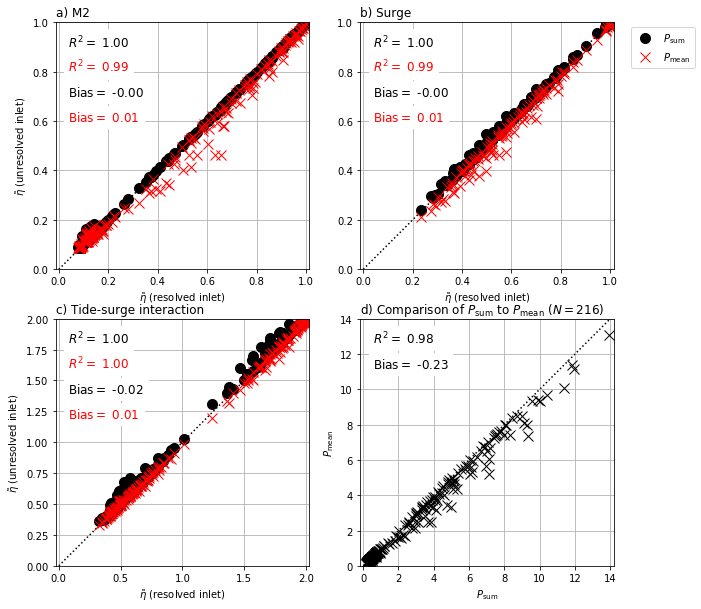

In [8]:
def R2(targets,predictions,axis=None):
    if axis is None:
        return 1 - np.ma.sum((targets-predictions)**2)/np.ma.sum((predictions-np.ma.mean(targets))**2)
    else:
        return 1 - np.ma.sum((targets-predictions)**2,axis=axis)/np.ma.sum((predictions-np.ma.mean(targets,axis=axis)[:,None])**2,axis=axis)

def Bias(mod,obs,axis=None):
    #mean absolute error between two time series
    if axis is None:
        mae=np.ma.mean(mod-obs)
    else:
        mae = np.ma.mean(mod-obs,axis=axis)
    return(mae)

###Summarizing plot
a_summary_resolved=np.load(outdir_dump+'a_summary_resolved_tide-surge.npy',allow_pickle=True)
a_summary_Psum=np.load(outdir_dump+'a_summary_Psum_tide-surge.npy',allow_pickle=True)
a_summary_Pmean=np.load(outdir_dump+'a_summary_Pmean_tide-surge.npy',allow_pickle=True)

P_summary_resolved=np.load(outdir_dump+'P_summary_resolved_tide-surge.npy',allow_pickle=True)
P_summary_Psum=np.load(outdir_dump+'P_summary_Psum_tide-surge.npy',allow_pickle=True)
P_summary_Pmean=np.load(outdir_dump+'P_summary_Pmean_tide-surge.npy',allow_pickle=True)

zeta_summary_resolved=np.load(outdir_dump+'zeta_summary_resolved_tide-surge.npy',allow_pickle=True)
zeta_summary_mean=np.load(outdir_dump+'zeta_summary_mean_tide-surge.npy',allow_pickle=True)

a_summary_resolved = np.ma.masked_invalid(a_summary_resolved)
a_summary_Psum = np.ma.masked_invalid(a_summary_Psum)
a_summary_Pmean = np.ma.masked_invalid(a_summary_Pmean)

R2_summary_mean = R2(a_summary_resolved,a_summary_Pmean,axis=1)
R2_summary_sum = R2(a_summary_resolved,a_summary_Psum,axis=1)
Bias_summary_mean = Bias(a_summary_resolved,a_summary_Pmean,axis=1)
Bias_summary_sum = Bias(a_summary_resolved,a_summary_Psum,axis=1)
#R2_summary_mean = R2(a_summary_resolved[~np.isnan(a_summary_resolved)],a_summary_Pmean[~np.isnan(a_summary_resolved)],axis=1)
#R2_summary_sum  = R2(a_summary_resolved[~np.isnan(a_summary_resolved)],a_summary_Psum[~np.isnan(a_summary_resolved)],axis=1)
#Bias_summary_mean = Bias(a_summary_Pmean[~np.isnan(a_summary_resolved)],a_summary_resolved[~np.isnan(a_summary_resolved)],axis=1)
#Bias_summary_sum  = Bias(a_summary_Psum[~np.isnan(a_summary_resolved)],a_summary_resolved[~np.isnan(a_summary_resolved)],axis=1)

fig_sum,axx_sum=plt.subplots(2,2,figsize=(10,10))

axx_sum=axx_sum.flatten()
axx_sum[0].grid('on')
axx_sum[0].set_title('a) M2', loc = 'left')
axx_sum[0].axis('equal')
axx_sum[0].text(0.05,0.8, '$R^2=$ '+str( '%.2f' % R2_summary_mean[0] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[0].transAxes)
axx_sum[0].text(0.05,0.9, '$R^2=$ '+str( '%.2f' % R2_summary_sum[0] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[0].transAxes)
axx_sum[0].text(0.05,0.6, 'Bias$=$ '+str( '%.2f' % Bias_summary_mean[0] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[0].transAxes)
axx_sum[0].text(0.05,0.7, 'Bias$=$ '+str( '%.2f' % Bias_summary_sum[0] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[0].transAxes)

axx_sum[0].plot([0.,1.],[0.,1.],ls='dotted',color='k')
axx_sum[0].plot(a_summary_resolved[0],a_summary_Psum[0],'ko',markersize=10,label = '$P_{\mathrm{sum}}$')
axx_sum[0].plot(a_summary_resolved[0],a_summary_Pmean[0],'rx',markersize=10,label = '$P_{\mathrm{mean}}$')
axx_sum[0].set_ylabel('$\\tilde{\eta}$ (unresolved inlet)')
axx_sum[0].set_xlabel('$\\tilde{\eta}$ (resolved inlet)')
axx_sum[0].set_ylim(0.0,1.0)
axx_sum[0].set_xlim(0.0,1.0)
#axx_sum[0].legend(bbox_to_anchor = (1.05,1.0),loc='upper left')

#summarizing plot
axx_sum[1].grid('on')
axx_sum[1].set_title('b) Surge', loc = 'left')
axx_sum[1].axis('equal')
axx_sum[1].text(0.05,0.8, '$R^2=$ '+str( '%.2f' % R2_summary_mean[1] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[1].transAxes)
axx_sum[1].text(0.05,0.9, '$R^2=$ '+str( '%.2f' % R2_summary_sum[1] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[1].transAxes)
axx_sum[1].text(0.05,0.6, 'Bias$=$ '+str( '%.2f' % Bias_summary_mean[1] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[1].transAxes)
axx_sum[1].text(0.05,0.7, 'Bias$=$ '+str( '%.2f' % Bias_summary_sum[1] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[1].transAxes)
axx_sum[1].plot([0.,1.],[0.,1.],ls='dotted',color='k')
axx_sum[1].plot(a_summary_resolved[1],a_summary_Psum[1],'ko',markersize=10,label = '$P_{\mathrm{sum}}$')
axx_sum[1].plot(a_summary_resolved[1],a_summary_Pmean[1],'rx',markersize=10,label = '$P_{\mathrm{mean}}$')
#axx_sum[1].set_ylabel('$\\tilde{\eta}$ (unresolved inlet)')
axx_sum[1].set_xlabel('$\\tilde{\eta}$ (resolved inlet)')
axx_sum[1].set_ylim(0.0,1.0)
axx_sum[1].set_xlim(0.0,1.0)

axx_sum[2].set_title('c) Tide-surge interaction',loc='left')#,fontsize=15.0)
axx_sum[2].grid('on')
axx_sum[2].axis('equal')
axx_sum[2].text(0.05,0.8, '$R^2=$ '+str( '%.2f' % R2_summary_mean[2] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[2].transAxes)
axx_sum[2].text(0.05,0.9, '$R^2=$ '+str( '%.2f' % R2_summary_sum[2] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[2].transAxes)
axx_sum[2].text(0.05,0.6, 'Bias$=$ '+str( '%.2f' % Bias_summary_mean[2] ),color='red',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[2].transAxes)
axx_sum[2].text(0.05,0.7, 'Bias$=$ '+str( '%.2f' % Bias_summary_sum[2] ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[2].transAxes)
axx_sum[2].plot([0.,2.],[0.,2.],ls='dotted',color='k')
axx_sum[2].plot(a_summary_resolved[2],a_summary_Psum[2],'ko',markersize=10,label = '$P_{\mathrm{sum}}$')
axx_sum[2].plot(a_summary_resolved[2],a_summary_Pmean[2],'rx',markersize=10,label = '$P_{\mathrm{mean}}$')
axx_sum[2].set_ylabel('$\\tilde{\eta}$ (unresolved inlet)')
axx_sum[2].set_xlabel('$\\tilde{\eta}$ (resolved inlet)')
axx_sum[2].set_ylim(0.0,2.0)
axx_sum[2].set_xlim(0.0,2.0)
axx_sum[1].legend(bbox_to_anchor = (1.05,1.0),loc='upper left')

R2_P  = R2(np.array(P_summary_Psum[0]),np.array(P_summary_Pmean[0]))
Bias_P = Bias(np.array(P_summary_Pmean[0]),np.array(P_summary_Psum[0]))


axx_sum[3].set_title('d) Comparison of $P_{\mathrm{sum}}$ to $P_{\mathrm{mean}}$ ($N='+str(len(a_summary_Psum[2]))+'$)',loc='left')#,fontsize=15.0)
axx_sum[3].grid('on')
axx_sum[3].axis('equal')
axx_sum[3].text(0.05,0.9, '$R^2=$ '+str( '%.2f' % R2_P ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[3].transAxes)
axx_sum[3].text(0.05,0.8, 'Bias$=$ '+str( '%.2f' % Bias_P ),color='k',fontsize=12,
           bbox=(dict(facecolor='white',edgecolor='white')),transform = axx_sum[3].transAxes)
axx_sum[3].plot(P_summary_Psum[0],P_summary_Pmean[0],'kx',markersize=10)
axx_sum[3].plot([0.,15.],[0.,15.],ls='dotted',color='k')
axx_sum[3].set_xlabel('$P_{\mathrm{sum}}$')
axx_sum[3].set_ylabel('$P_{\mathrm{mean}}$')
axx_sum[3].set_ylim(0.0,14.0)
axx_sum[3].set_xlim(0.0,14.0)
#axx_sum[4].scatter(P_summary_Psum[1],P_summary_Pmean[1])

#axx_sum[5].scatter(P_summary_Psum[2],P_summary_Pmean[2])

plt.savefig(outdir_dump+'Psum_Pmean_vs_resolved_channel.png',format = 'png',bbox_inches='tight',dpi=300)

Supplement: Limits of NNL and other interpretation

In [ ]:
SLRs_non_dim = np.linspace(0.0,2.0,21,endpoint=True)

P = 1.0
zeta = 1.0
result_NNLs_Phi_P1_zeta_1 = np.zeros(SLRs_non_dim.shape)
for i,SLR in enumerate(SLRs_non_dim):
    eta_result_stig_const = model_non_dim(zeta,P,dt_non_dim,T_max_non_dim,
                                                       eta_data_non_dim+eta_surge_6h_a+SLR,
                                                       S=0,integration='RK')
    
    Amp_lagoon = eta_result_stig_const.max()
    #print(j,i,z,p,Amp_M2_lagoon_const)
    result_NNLs_Phi_P1_zeta_1[i] = Amp_lagoon      

SLRs_non_dim.dump(outdir_dump+'SLRs_non_dim.npy')
result_NNLs_Phi_P1_zeta_1.dump(outdir_dump+'result_NNLs_Phi_P1_zeta_1.npy')

P = 2.0
zeta = 1.0
result_NNLs_Phi_P2_zeta_1 = np.zeros(SLRs_non_dim.shape)
for i,SLR in enumerate(SLRs_non_dim):
    eta_result_stig_const = model_non_dim(zeta,P,dt_non_dim,T_max_non_dim,
                                                       eta_data_non_dim+eta_surge_6h_a+SLR,
                                                       S=0,integration='RK')
    
    Amp_lagoon = eta_result_stig_const.max()
    #print(j,i,z,p,Amp_M2_lagoon_const)
    result_NNLs_Phi_P2_zeta_1[i] = Amp_lagoon      

result_NNLs_Phi_P2_zeta_1.dump(outdir_dump+'result_NNLs_Phi_P2_zeta_1.npy')

P = 0.5
zeta = 1.0
result_NNLs_Phi_P05_zeta_1 = np.zeros(SLRs_non_dim.shape)
for i,SLR in enumerate(SLRs_non_dim):
    eta_result_stig_const = model_non_dim(zeta,P,dt_non_dim,T_max_non_dim,
                                                       eta_data_non_dim+eta_surge_6h_a+SLR,
                                                       S=0,integration='RK')
    
    Amp_lagoon = eta_result_stig_const.max()
    #print(j,i,z,p,Amp_M2_lagoon_const)
    result_NNLs_Phi_P05_zeta_1[i] = Amp_lagoon      

result_NNLs_Phi_P05_zeta_1.dump(outdir_dump+'result_NNLs_Phi_P05_zeta_1.npy')

Plot

In [ ]:
### SUPPLEMENT NNL SLR dependence P-interpretation with SLR

def new_params(P,zeta,SLR):
    P_new = P*(1+SLR)**(1.5)
    zeta_new = zeta/(1+SLR)
    return P_new, zeta_new

cmap = 'YlOrRd'
cmap_div = 'seismic'
import cmocean
cmap = cmocean.cm.matter
cmap_div = cmocean.cm.balance
### Plot Q_r mean water level in lagoon compared to eta_0 = 0
P_ar = np.load(outdir_dump+'P_ar.npy',allow_pickle=True)
zeta_ar = np.load(outdir_dump+'zeta_ar.npy',allow_pickle=True)
pp1,zz = np.meshgrid(P_ar,zeta_ar)

result_tide_surge = np.load(outdir_dump+'result_tide_surge.npy',allow_pickle=True)

fig,axx=plt.subplots(1,3,figsize=(14,4))
ax=axx.flatten()

ax[0].set_title('a) max($\\tilde{\eta}$) for a tide-surge',loc='left',fontsize=12.0)
ax[0].grid('on')
cont = ax[0].contourf(pp1,zz,result_tide_surge,vmin=0.0,vmax=3.0,cmap=cmap,
                      levels=np.linspace(0.0,3.0,31,endpoint=True))
plt.colorbar(cont,label='max($\\tilde{\eta}$)',ax = ax[0],orientation='horizontal',pad=0.15)
ax[0].set_ylabel('$a/H$')
ax[0].set_xlabel('$P$')
ax[0].set_ylim(0.1,1.0)
ax[0].set_xlim(0.1,5.0)
#ax[0].axvline(0.5,ls='dotted',color='k')
#ax[0].axvline(1.0,ls='dotted',color='k')
#ax[0].axvline(2.0,ls='dotted',color='k')
ax[0].plot([0.5,1.0,2.0],[1.0,1.0,1.0],'o',color='k')
P_new, zeta_new = new_params(np.array([0.5,1.0,2.0]),np.array([1.0,1.0,1.0]),2./3.)
ax[0].annotate("", xy=(P_new[0], zeta_new[0]), xytext=(0.5, 1),arrowprops=dict(arrowstyle="->"))
ax[0].annotate("", xy=(P_new[1], zeta_new[1]), xytext=(1, 1),arrowprops=dict(arrowstyle="->"))
ax[0].annotate("", xy=(P_new[2], zeta_new[2]), xytext=(2, 1),arrowprops=dict(arrowstyle="->"))
ax[0].plot(P_new,zeta_new,'x',color='k')

SLRs_non_dim = np.load(outdir_dump+'SLRs_non_dim.npy',allow_pickle=True)
result_NNLs_Phi_P05_zeta_1= np.load(outdir_dump+'result_NNLs_Phi_P05_zeta_1.npy',allow_pickle=True)
result_NNLs_Phi_P1_zeta_1= np.load(outdir_dump+'result_NNLs_Phi_P1_zeta_1.npy',allow_pickle=True)
result_NNLs_Phi_P2_zeta_1= np.load(outdir_dump+'result_NNLs_Phi_P2_zeta_1.npy',allow_pickle=True)

ax[1].set_title('b) max($\\tilde{\eta}$) relative to new mean sea level',loc='left',fontsize=12.0)
ax[1].grid('on')
ax[1].plot(SLRs_non_dim,result_NNLs_Phi_P05_zeta_1-SLRs_non_dim,label='$P=0.5$, $a/H=1.0$')
ax[1].plot(SLRs_non_dim,result_NNLs_Phi_P1_zeta_1-SLRs_non_dim,label='$P=1$, $a/H=1.0$')
ax[1].plot(SLRs_non_dim,result_NNLs_Phi_P2_zeta_1-SLRs_non_dim,label='$P=2$, $a/H=1.0$')
#plt.colorbar(cont,label='max($\\tilde{\eta}$)',ax = ax[0],orientation='horizontal',pad=0.15)
ax[1].legend(loc='lower right')
ax[1].set_ylabel('$\\tilde{\eta}$')
ax[1].set_xlabel('$\mathrm{SLR}/a$')
ax[1].set_ylim(1.0,2.1)
ax[1].set_xlim(0.0,2.0)
ax[1].axvline(2./3.0,ls='dashed',color='k')
y_max_interp = np.interp(P_new,pp1[zz==0.6],result_tide_surge[zz==0.6])
ax[1].scatter(np.full(y_max_interp.shape,2./3.),y_max_interp,marker='o',color='k')#, facecolors='none')

ax[2].set_title('c) NNL different SLR scenarios',loc='left',fontsize=12.0)
ax[2].grid('on')
ax[2].plot(SLRs_non_dim,NNL(result_NNLs_Phi_P05_zeta_1[0],result_NNLs_Phi_P05_zeta_1,SLRs_non_dim),label='$P=0.5$, $a/H=1.0$')
ax[2].plot(SLRs_non_dim,NNL(result_NNLs_Phi_P1_zeta_1[0],result_NNLs_Phi_P1_zeta_1,SLRs_non_dim),label='$P=1$, $a/H=1.0$')
ax[2].plot(SLRs_non_dim,NNL(result_NNLs_Phi_P2_zeta_1[0],result_NNLs_Phi_P2_zeta_1,SLRs_non_dim),label='$P=2$, $a/H=1.0$')
#plt.colorbar(cont,label='max($\\tilde{\eta}$)',ax = ax[0],orientation='horizontal',pad=0.15)
#ax[2].legend(bbox_to_anchor=(1.05,1),loc='upper left')
ax[2].set_ylabel('NNL')
ax[2].set_xlabel('$\mathrm{SLR}/a$')
#ax[2].set_ylim(1.0,2.1)
ax[2].set_xlim(0.0,2.0)
ax[2].axvline(2./3.0,ls='dashed',color='k')

fig.subplots_adjust(hspace=0.15,wspace=0.22)
#ax[0].legend(loc='upper left')
plt.savefig(outdir_dump+'Supplement_P_SLR_adaption_NNL_limits.png',format = 'png',bbox_inches='tight',dpi=300)